In [32]:
import pandas as pd
import numpy as np
import mltools as ml
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler

X_data = pd.read_csv('data/X_train.txt')
Y_data = pd.read_csv('data/Y_train.txt')


'''scaler = MinMaxScaler()
scaler.fit(X_data)
scaler.transform(X_data)'''

# #apply SelectKBest class to extract top 10 best features
X = X_data.iloc[:,:-1]
Y = Y_data.iloc[:,-1]


bestfeatures = SelectKBest(score_func=f_classif, k="all" )
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfscores],axis=1)

featureScores.columns = ['Score']  #naming the dataframe columns
df = featureScores.nlargest(2,'Score')
print("Features ordered by Score: ")
top_features = []
for index, row in df.iterrows():
    top_features.append(index)
    print(index, row['Score'])


Features ordered by Score: 
56 251.0596379353373
24 72.30120144068337


1 0.4835016835016835
2 0.49427609427609426
5 0.4861952861952862
10 0.47878787878787876
50 0.4713804713804714
100 0.4585858585858586
200 0.43434343434343436
Training and validation error as a function of K:


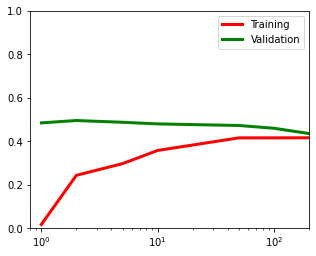

In [33]:
import numpy as np
np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt 

X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')
Xa = []
for a in top_features:
    Xa.append(X[:,a])


X,Y=ml.shuffleData(X,Y)
X,_=ml.transforms.rescale(X)
Xtr,Xva,Ytr,Yva=ml.splitData(X,Y,.80)
Xtra = []
Xvaa = []
for a in top_features:
    Xtra.append(Xtr[:,a])
    Xvaa.append(Xva[:,a])

    
Xtra = np.asarray(Xtra).T
Xvaa = np.asarray(Xvaa).T

knn = ml.knn.knnClassify(Xtra,Ytr)
k_values = [1,2,5,10,50,100,200]


fig,ax=plt.subplots(1,1,figsize=(5,4))

errTr=np.zeros(len(k_values))
errVa=np.zeros(errTr.shape[0])
# print(Xtra)
for i,k in enumerate(k_values):
    
    knn.train(Xtra,Ytr,K=k)
    YvaHat = knn.predict(Xvaa)

    errTr[i]=knn.err(Xtra,Ytr)
    errVa[i]=knn.err(Xvaa,Yva)
    print(k, knn.err(Xvaa,Yva))
    
ax.semilogx(k_values,errTr,'r-',lw=3,label='Training')
ax.semilogx(k_values,errVa,'g-',lw=3,label='Validation')
ax.legend()
ax.set_xlim(.8,200)
ax.set_ylim(0,1)
print("Training and validation error as a function of K:")
plt.show()



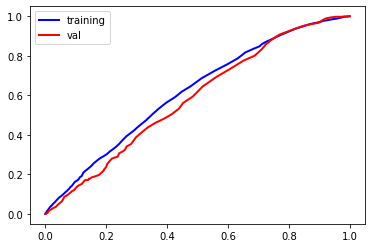

AUC training Area: 0.6156
AUC val Area: 0.5819


In [34]:
learner = ml.knn.knnClassify(Xtra,Ytr) # train a model using training data X,Y
learner.train(Xtra,Ytr,K=200)
fpr, tpr, tnr = learner.roc(Xtra, Ytr) #apply ROC on training data
fpr2, tpr2, tnr2 = learner.roc(Xvaa, Yva) #apply ROC on validation data
plt.plot(fpr, tpr, 'b-', label = "training", linewidth = 2) #plot training 
plt.plot(fpr2, tpr2, 'r-', label = "val", linewidth = 2) #plot validation
plt.legend(fontsize=10, loc=0)
plt.show()


print('AUC training Area: %0.4f' %(learner.auc(Xtra, Ytr)))
print('AUC val Area: %0.4f' %(learner.auc(Xvaa, Yva)))


Xte = np.genfromtxt('data/X_test.txt', delimiter=',')
Xtea = []

for a in top_features:
    Xtea.append(Xte[:,a])
Xtea = np.asarray(Xtea).T

Yte =np.vstack((np.arange(Xtea.shape[0]), learner.predict(Xtea))).T 

# Output a file with two columns, a row ID and a confidence in class 1: 

np.savetxt('Y_project_submit.txt',Yte,'%d, %.2f',header='Id,Predicted',comments='',delimiter=',')


In [14]:
a = np.asarray([[1,2,4],[1,2,3]])
print(a.shape)

print(Yte)

(2, 3)
[[0.000e+00 1.000e+00]
 [1.000e+00 0.000e+00]
 [2.000e+00 1.000e+00]
 ...
 [7.419e+03 1.000e+00]
 [7.420e+03 1.000e+00]
 [7.421e+03 0.000e+00]]


## Random Forests